In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


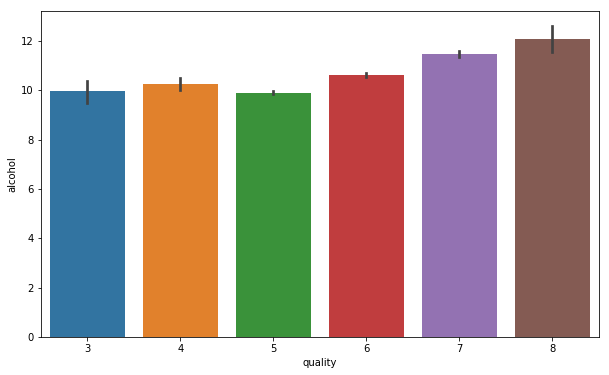

In [5]:
#try to visualize each features relevance with quality score
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [6]:
bins = [2,6,9] #Since max quality score is 8 and min quality score is 3, devide them reseasonably with the boundary of 6
quality_labels = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = quality_labels, include_lowest = True)

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality']) #assign "bad" 0 and "good" 1

In [7]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [8]:
#data preprocessing
X = wine.drop('quality', axis = 1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=35)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

#Cross validation with rfc
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 13)
rfc_eval.mean()

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       287
           1       0.67      0.55      0.60        33

   micro avg       0.93      0.93      0.93       320
   macro avg       0.81      0.76      0.78       320
weighted avg       0.92      0.93      0.92       320

[[278   9]
 [ 15  18]]


0.896751185322614

In [14]:
#Stochastic Gradient Descent
sgd = SGDClassifier(loss = 'squared_hinge',penalty='none')
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))
print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       287
           1       0.49      0.52      0.50        33

   micro avg       0.89      0.89      0.89       320
   macro avg       0.71      0.73      0.72       320
weighted avg       0.90      0.89      0.90       320

[[269  18]
 [ 16  17]]


C:\Users\tsofr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [11]:
#Finding best parameters for SVC model
svc = SVC()
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}

In [13]:
#Support Vector Classifier
svc = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       287
           1       0.88      0.45      0.60        33

   micro avg       0.94      0.94      0.94       320
   macro avg       0.91      0.72      0.78       320
weighted avg       0.93      0.94      0.93       320

[[285   2]
 [ 18  15]]
